# Risk Analytics In Banking And Financial Services

        Case Study on Bank's lending process by analysing the dataset containing the past loan appicants while identifying the patterns which indicates risk associated applicants which may default on loan.
        

## Problem Statement

        A Consumer Finance Company that specialises in providing various types of loans to urban customers. When the company receives a loan application, it has to decide whether to approve or reject it based on the applicant’s profile.
        Company experience a heavy loss if a borrower defaults on his loan. In another case if applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
        Company wants to understand the driving factors (or driver variables) behind loan default, thereby cutting down the amount of credit loss. 
        
## Task for Data Analyst   
   
-  Importing the given Dataset of loan applicants from 2007 to 2011
-  Data Cleaning
-  Analysis of Dataset given 
-  Identify the pattern of risky loan applicants

### Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#

### Import loan applicants dataset

In [3]:
df_loan = pd.read_csv('loan.csv')
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df_loan.shape

(39717, 111)

#

### Retain columns which are important for analysis, drop other columns

In [5]:
important_columns = ['funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'total_acc']
df_loan.drop(columns = df_loan.columns.difference(important_columns), inplace=True)
df_loan.head().T

,0,1,2,3,4
funded_amnt,5000,2500,2400,10000,3000
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%
installment,162.87,59.83,84.33,339.31,67.79
emp_length,10+ years,< 1 year,10+ years,10+ years,1 year
home_ownership,RENT,RENT,RENT,RENT,RENT
annual_inc,24000.0,30000.0,12252.0,49200.0,80000.0
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified
issue_d,Dec-11,Dec-11,Dec-11,Dec-11,Dec-11
loan_status,Fully Paid,Charged Off,Fully Paid,Fully Paid,Current


In [6]:
df_loan.shape

(39717, 16)

#

### Check the dataframe

In [7]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funded_amnt          39717 non-null  int64  
 1   term                 39717 non-null  object 
 2   int_rate             39717 non-null  object 
 3   installment          39717 non-null  float64
 4   emp_length           38642 non-null  object 
 5   home_ownership       39717 non-null  object 
 6   annual_inc           39717 non-null  float64
 7   verification_status  39717 non-null  object 
 8   issue_d              39717 non-null  object 
 9   loan_status          39717 non-null  object 
 10  purpose              39717 non-null  object 
 11  addr_state           39717 non-null  object 
 12  dti                  39717 non-null  float64
 13  delinq_2yrs          39717 non-null  int64  
 14  open_acc             39717 non-null  int64  
 15  total_acc            39717 non-null 

In [8]:
df_loan.isnull().sum()

funded_amnt               0
term                      0
int_rate                  0
installment               0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
open_acc                  0
total_acc                 0
dtype: int64

In [9]:
df_loan.describe()

,funded_amnt,installment,annual_inc,dti,delinq_2yrs,open_acc,total_acc
count,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000
mean,10947.713196,324.561922,6.896893e+04,13.315130,0.146512,9.294408,22.088828
std,7187.238670,208.874874,6.379377e+04,6.678594,0.491812,4.400282,11.401709
min,500.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,2.000000
25%,5400.000000,167.020000,4.040400e+04,8.170000,0.000000,6.000000,13.000000
50%,9600.000000,280.220000,5.900000e+04,13.400000,0.000000,9.000000,20.000000
75%,15000.000000,430.780000,8.230000e+04,18.600000,0.000000,12.000000,29.000000
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,44.000000,90.000000


#

## Data Cleaning

### 1) Convert 'term' column to 'int' datatype from 'object' datatype

In [10]:
df_loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [11]:
df_loan.rename(columns={'term': 'term_in_months'}, inplace=True)

In [12]:
# Remove 'month' string from all rows
df_loan['term_in_months'] = df_loan['term_in_months'].apply(lambda x: int(36) if x ==  ' 36 months' else x)

In [13]:
df_loan['term_in_months'] = df_loan['term_in_months'].apply(lambda x: int(60) if x == ' 60 months' else x)

#

### 2) Convert 'int_rate' column to 'float' datatype from 'object' datatype

In [14]:
# Remove '%' string from all rows
df_loan['int_rate'] = df_loan['int_rate'].apply(lambda x: float(x[0:-1]))

In [15]:
df_loan['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

#

### 3) Data cleaning of 'emp_length' column

'emp_length' contains null values of 2.7% (around 1700 entries) of total rows. Replacing null values with 'not_disclosed' so that I can retain whole data without dropping any rows.

In [16]:
df_loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [17]:
null_total = df_loan['emp_length'].isnull().sum()
total_entries = len(df_loan['emp_length'])
null_percentage = (null_total/total_entries)*100
null_percentage

2.7066495455346575

In [18]:
df_loan['emp_length'].fillna('not_disclosed', inplace = True)

In [19]:
df_loan['emp_length'].value_counts()

10+ years        8879
< 1 year         4583
2 years          4388
3 years          4095
4 years          3436
5 years          3282
1 year           3240
6 years          2229
7 years          1773
8 years          1479
9 years          1258
not_disclosed    1075
Name: emp_length, dtype: int64

# 

### 4) Change date format of 'issue_d'

In [20]:
df_loan['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

In [21]:
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'], format='%b-%y')
df_loan['issue_d'] = df_loan['issue_d'].dt.strftime('%b %Y')

In [22]:
df_loan['issue_d']

0        Dec 2011
1        Dec 2011
2        Dec 2011
3        Dec 2011
4        Dec 2011
           ...   
39712    Jul 2007
39713    Jul 2007
39714    Jul 2007
39715    Jul 2007
39716    Jun 2007
Name: issue_d, Length: 39717, dtype: object

#

## Handling Outliers

- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**

In [23]:
df_loan.head(10).T

,0,1,2,3,4,5,6,7,8,9
funded_amnt,5000,2500,2400,10000,3000,5000,7000,3000,5600,5375
term_in_months,36,60,36,36,60,36,60,36,60,60
int_rate,10.65,15.27,15.96,13.49,12.69,7.9,15.96,18.64,21.28,12.69
installment,162.87,59.83,84.33,339.31,67.79,156.46,170.08,109.43,152.39,121.45
emp_length,10+ years,< 1 year,10+ years,10+ years,1 year,3 years,8 years,9 years,4 years,< 1 year
home_ownership,RENT,RENT,RENT,RENT,RENT,RENT,RENT,RENT,OWN,RENT
annual_inc,24000.0,30000.0,12252.0,49200.0,80000.0,36000.0,47004.0,48000.0,40000.0,15000.0
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified,Source Verified,Not Verified,Source Verified,Source Verified,Verified
issue_d,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011
loan_status,Fully Paid,Charged Off,Fully Paid,Fully Paid,Current,Fully Paid,Fully Paid,Fully Paid,Charged Off,Charged Off


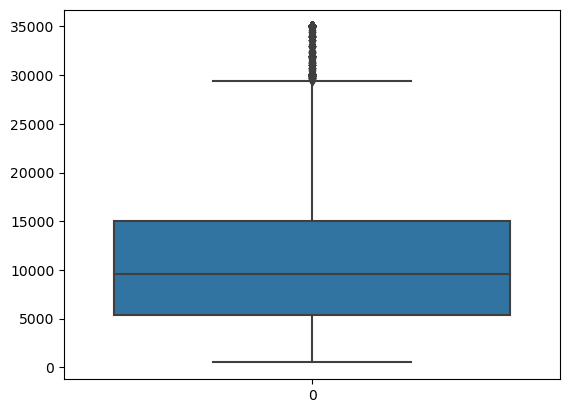

In [24]:
# Analysing outliers in bank funded amount
sns.boxplot(df_loan['funded_amnt'])
plt.show()

In [25]:
(df_loan['funded_amnt'] > 30000).sum()

686

## Observation from above graph

- **There are 686 borrowers who borrowed high fund(more than 30000) from bank.**
- **These outliers are important for the analysis which is useful in future hence retaining these rows is necessory**

#

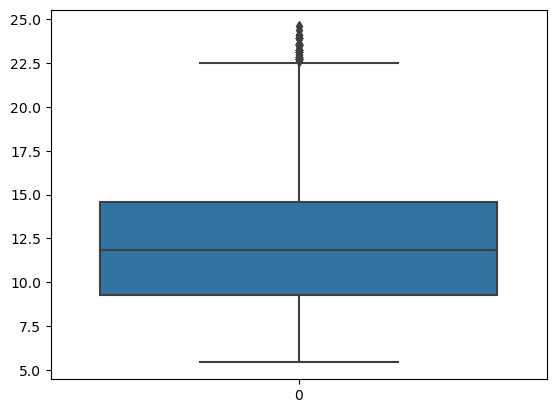

In [26]:
# Analysing outliers in interest rate 
sns.boxplot(df_loan['int_rate'])
plt.show()

In [27]:
(df_loan['int_rate'] > 22.5).sum()

78

## Observation from above graph

- **There are 78 borrowers who borrowed fund with high interest( more than 22.5%) from bank.**
- **These outliers are important for the analysis which is useful in future hence retaining these rows is necessory**

#

## Analysing loan category 
- **There is a category of current borrowers with we can predict potential loan defaults.**
- **Since we need loan default entries the current borrowers who presently crediting installment are not needed for analysis, hence dropping the Current category is necessary for analysis.**

In [28]:
Loan_status_category = df_loan['loan_status'].value_counts()
total_entries = len(df_loan['loan_status'])
category_percentage = (Loan_status_category/total_entries)*100
category_percentage

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

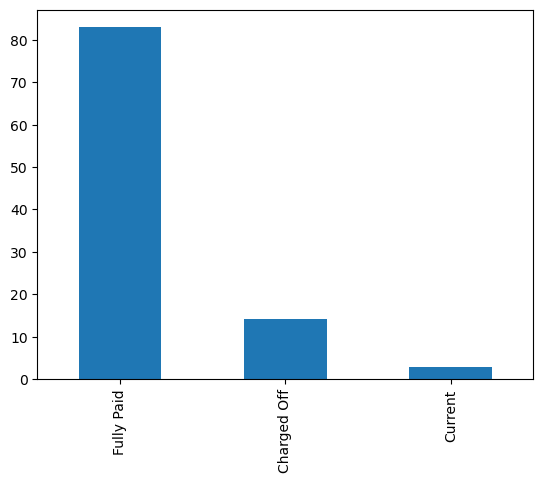

In [29]:
category_percentage.plot(kind='bar')
plt.show()

#

## Potential loan defaults from currently active borrowers

'delinq_2yrs' = The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [30]:
potential_loan_defaults= df_loan[(df_loan['loan_status'] == 'Current') & (df_loan['delinq_2yrs'] > 0)]
potential_loan_defaults.shape

(121, 16)

In [31]:
potential_loan_defaults['delinq_2yrs'].value_counts()

1    96
2    14
3     8
4     2
5     1
Name: delinq_2yrs, dtype: int64

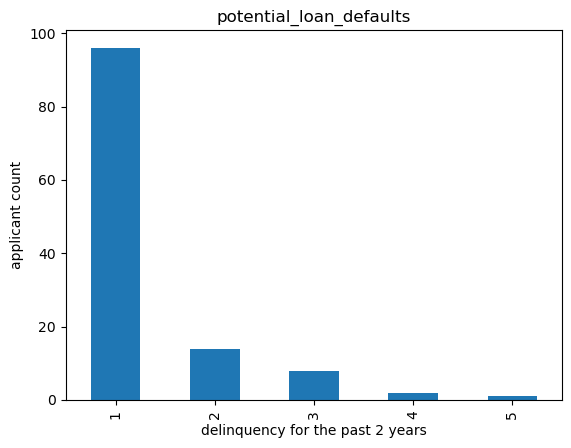

In [32]:
potential_loan_defaults['delinq_2yrs'].value_counts().plot(kind='bar')
plt.title('potential_loan_defaults')
plt.xlabel('delinquency for the past 2 years')
plt.ylabel('applicant count')

plt.show()

## Observation from above Graph
- **There are 121 borrowers who are having 30+ days past-due incidences of delinquency.**
- **There are 25 borrowers who are having 30+ days past-due incidences of delinquency more than once, may be a potential_loan_defaults.**
 

#

### Drop Current Category from 'loan_status' Column 
- **There are 1140 Current Category borrowers present from 'loan_status' column**
- **Dropping the 1140 Current Category entries from 'df_loan dataset' and copy final dataset to 'df_loan1 dataset'**

In [33]:
df_loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [34]:
df_loan1 = df_loan[~(df_loan['loan_status'] == 'Current')]

In [35]:
df_loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funded_amnt          38577 non-null  int64  
 1   term_in_months       38577 non-null  int64  
 2   int_rate             38577 non-null  float64
 3   installment          38577 non-null  float64
 4   emp_length           38577 non-null  object 
 5   home_ownership       38577 non-null  object 
 6   annual_inc           38577 non-null  float64
 7   verification_status  38577 non-null  object 
 8   issue_d              38577 non-null  object 
 9   loan_status          38577 non-null  object 
 10  purpose              38577 non-null  object 
 11  addr_state           38577 non-null  object 
 12  dti                  38577 non-null  float64
 13  delinq_2yrs          38577 non-null  int64  
 14  open_acc             38577 non-null  int64  
 15  total_acc            38577 non-null 

#

## Analysing loan installment

In [36]:
df_loan1['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

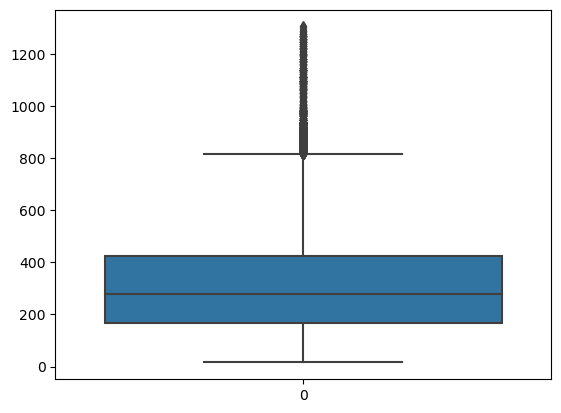

In [37]:
sns.boxplot(df_loan1['installment'])
plt.show()

### 'installment' column does not seems important for our analysis. Hence dropping the column 'installment'

In [38]:
df_loan1.drop(columns='installment', inplace=True)

In [39]:
df_loan1.head().T

,0,1,2,3,5
funded_amnt,5000,2500,2400,10000,5000
term_in_months,36,60,36,36,36
int_rate,10.65,15.27,15.96,13.49,7.9
emp_length,10+ years,< 1 year,10+ years,10+ years,3 years
home_ownership,RENT,RENT,RENT,RENT,RENT
annual_inc,24000.0,30000.0,12252.0,49200.0,36000.0
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified
issue_d,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011
loan_status,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid
purpose,credit_card,car,small_business,other,wedding


#

#  Univariate Analysis

## 1) Analysing bank's efficiency in applicant's income source verification

In [40]:
verifiction_category = df_loan1['verification_status'].value_counts(normalize = True)*100
verifiction_category

Not Verified       43.274490
Verified           31.640615
Source Verified    25.084895
Name: verification_status, dtype: float64

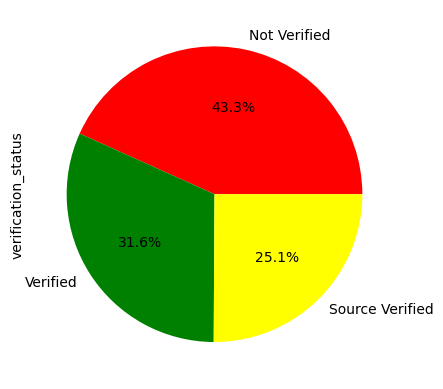

In [41]:
verifiction_category.plot.pie(y='values', autopct='%1.1f%%', startangle=0, colors=['Red','Green','Yellow'])
plt.show()


## Observation from above graph
- **Above graph shows over 43% of applicants received a loan without their income verification by bank before lending loan.**
- **This may increase the loan default or delay in loan repayment or delinquent.** 

#

## 2) Analysing lending diversification


In [42]:
loan_purpose = df_loan1['purpose'].value_counts(normalize = True)*100
loan_purpose

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

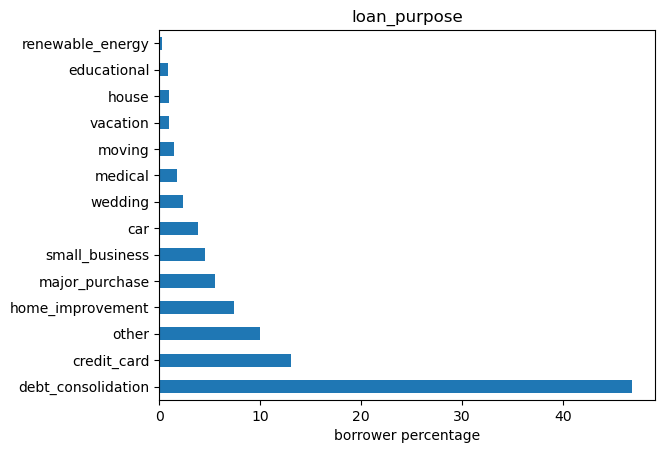

In [43]:
loan_purpose.plot(kind = 'barh')
plt.title('loan_purpose')
plt.xlabel('borrower percentage')
plt.show()

## Observation from above graph
- **Above graph shows over 46% of loan is issued for debt_consolidation**
- **Loan taken for Debt Consolidation is loan taken by person to pay off all existing loans. This shows a person's inability to pay loans** 
- **It is better to diversify lending money to other purpose or sectors to expect better debt repayments and enhance company return**

#

## 3) Categorisation of Interest rate column

### Create low, medium, high, very high category for int_rate column to ease the categorical visualisation

In [44]:
df_loan1['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [45]:
def categorize_interest(interest):
    if interest <= 8.0:
        return 'Low Interest'
    elif 8.0 < interest < 16.0:
        return 'Medium Interest'
    else:
        return 'High Interest'
    
df_loan1['int_cat'] = df_loan1['int_rate'].apply(categorize_interest)

In [46]:
df_loan1.head().T

,0,1,2,3,5
funded_amnt,5000,2500,2400,10000,5000
term_in_months,36,60,36,36,36
int_rate,10.65,15.27,15.96,13.49,7.9
emp_length,10+ years,< 1 year,10+ years,10+ years,3 years
home_ownership,RENT,RENT,RENT,RENT,RENT
annual_inc,24000.0,30000.0,12252.0,49200.0,36000.0
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified
issue_d,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011
loan_status,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid
purpose,credit_card,car,small_business,other,wedding


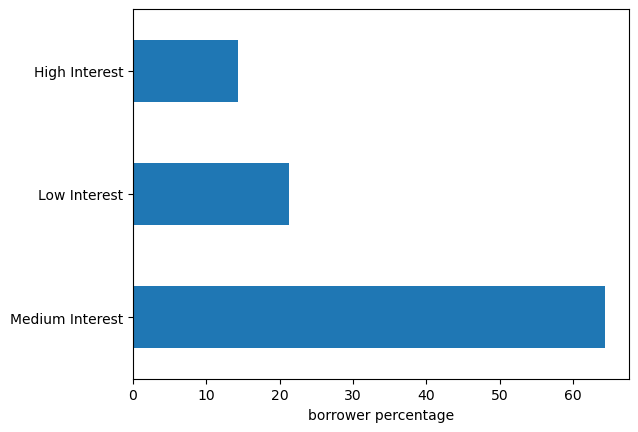

In [47]:
(df_loan1['int_cat'].value_counts(normalize = True)*100).plot.barh()
plt.xlabel('borrower percentage')
plt.show()

## Observation from above graph
- **Above graph shows over 60% of loan is issued with medium interest and less people got loan for high interest relatively**

#

## 4) Categorisation of loan amount column
### Create low, medium, high, very high category for funded_amnt column to ease the categorical visualisation

In [48]:
df_loan1['funded_amnt'].describe()

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [49]:
def categorize_loan_amount(amount):
    if amount <= 5200:
        return 'Low'
    elif 5200 < amount <= 9550:
        return 'Medium'
    elif 9550 < amount < 15000 :
        return 'High'
    else:
        return 'Very High'
    
df_loan1['funded_cat'] = df_loan1['funded_amnt'].apply(categorize_loan_amount)

In [50]:
df_loan1.head(20).T

,0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
funded_amnt,5000,2500,2400,10000,5000,7000,3000,5600,5375,6500,12000,9000,3000,10000,1000,10000,3600,6000,9200,20250
term_in_months,36,60,36,36,36,60,36,60,60,60,36,36,36,36,36,36,36,36,36,60
int_rate,10.65,15.27,15.96,13.49,7.9,15.96,18.64,21.28,12.69,14.65,12.69,13.49,9.91,10.65,16.29,15.27,6.03,11.71,6.03,15.27
emp_length,10+ years,< 1 year,10+ years,10+ years,3 years,8 years,9 years,4 years,< 1 year,5 years,10+ years,< 1 year,3 years,3 years,< 1 year,4 years,10+ years,1 year,6 years,3 years
home_ownership,RENT,RENT,RENT,RENT,RENT,RENT,RENT,OWN,RENT,OWN,OWN,RENT,RENT,RENT,RENT,RENT,MORTGAGE,MORTGAGE,RENT,RENT
annual_inc,24000.0,30000.0,12252.0,49200.0,36000.0,47004.0,48000.0,40000.0,15000.0,72000.0,75000.0,30000.0,15000.0,100000.0,28000.0,42000.0,110000.0,84000.0,77385.19,43370.0
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified,Not Verified,Source Verified,Source Verified,Verified,Not Verified,Source Verified,Source Verified,Source Verified,Source Verified,Not Verified,Not Verified,Not Verified,Verified,Not Verified,Verified
issue_d,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011
loan_status,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Charged Off,Charged Off,Fully Paid,Fully Paid,Charged Off,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid
purpose,credit_card,car,small_business,other,wedding,debt_consolidation,car,small_business,other,debt_consolidation,debt_consolidation,debt_consolidation,credit_card,other,debt_consolidation,home_improvement,major_purchase,medical,debt_consolidation,debt_consolidation


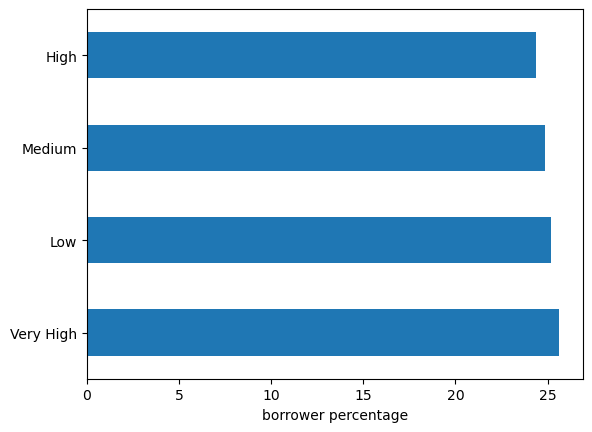

In [51]:
(df_loan1['funded_cat'].value_counts(normalize = True)*100).plot.barh()
plt.xlabel('borrower percentage')
plt.show()

## Observation from above graph
- **Above graph shows almost all loan amount catagory has equal number of borrowers. This shows bank lending is not specific to any one amount category**

## 5) Categorisation of Applicant's annual income column
### Create low, medium, high, very high category for annual_inc	column to ease the categorical visualisation

In [52]:
df_loan1['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [53]:
def categorize_income(income):
    if income <= 40000:
        return 'Low'
    elif 40000 < income <= 59000:
        return 'Medium'
    elif 59000 < income < 82000 :
        return 'High'
    else:
        return 'Very High'
    
df_loan1['income_cat'] = df_loan1['annual_inc'].apply(categorize_income)

In [54]:
df_loan1.head(20).T

,0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
funded_amnt,5000,2500,2400,10000,5000,7000,3000,5600,5375,6500,12000,9000,3000,10000,1000,10000,3600,6000,9200,20250
term_in_months,36,60,36,36,36,60,36,60,60,60,36,36,36,36,36,36,36,36,36,60
int_rate,10.65,15.27,15.96,13.49,7.9,15.96,18.64,21.28,12.69,14.65,12.69,13.49,9.91,10.65,16.29,15.27,6.03,11.71,6.03,15.27
emp_length,10+ years,< 1 year,10+ years,10+ years,3 years,8 years,9 years,4 years,< 1 year,5 years,10+ years,< 1 year,3 years,3 years,< 1 year,4 years,10+ years,1 year,6 years,3 years
home_ownership,RENT,RENT,RENT,RENT,RENT,RENT,RENT,OWN,RENT,OWN,OWN,RENT,RENT,RENT,RENT,RENT,MORTGAGE,MORTGAGE,RENT,RENT
annual_inc,24000.0,30000.0,12252.0,49200.0,36000.0,47004.0,48000.0,40000.0,15000.0,72000.0,75000.0,30000.0,15000.0,100000.0,28000.0,42000.0,110000.0,84000.0,77385.19,43370.0
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified,Not Verified,Source Verified,Source Verified,Verified,Not Verified,Source Verified,Source Verified,Source Verified,Source Verified,Not Verified,Not Verified,Not Verified,Verified,Not Verified,Verified
issue_d,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011
loan_status,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Charged Off,Charged Off,Fully Paid,Fully Paid,Charged Off,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid
purpose,credit_card,car,small_business,other,wedding,debt_consolidation,car,small_business,other,debt_consolidation,debt_consolidation,debt_consolidation,credit_card,other,debt_consolidation,home_improvement,major_purchase,medical,debt_consolidation,debt_consolidation


In [55]:
df_loan1['income_cat'].value_counts()

Very High    9730
Medium       9708
Low          9698
High         9441
Name: income_cat, dtype: int64

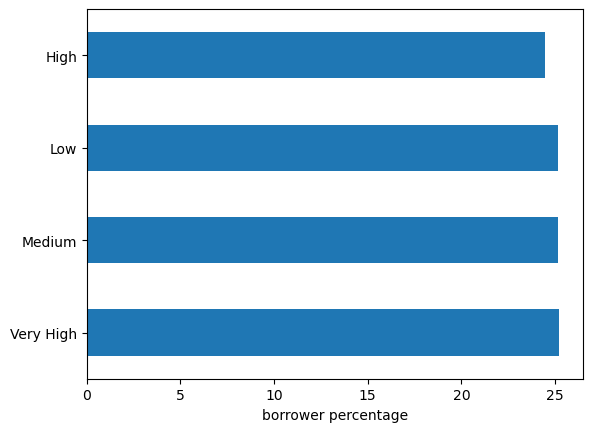

In [56]:
(df_loan1['income_cat'].value_counts(normalize = True)*100).plot.barh()
plt.xlabel('borrower percentage')
plt.show()

## Observation from above graph
- **Above graph shows bank lending is distributed to all income category.**

#

## 6) Categorisation of Applicant's working experience column
### Create entry level, Junior level, middle level & senior level category for emp_length column to ease the categorical visualisation

In [57]:
df_loan1['emp_length'].value_counts()

10+ years        8488
< 1 year         4508
2 years          4291
3 years          4012
4 years          3342
5 years          3194
1 year           3169
6 years          2168
7 years          1711
8 years          1435
9 years          1226
not_disclosed    1033
Name: emp_length, dtype: int64

In [58]:
entry_level = ['< 1 year', '2 years','1 year']
junior_level = ['3 years', '4 years']
mid_level = ['5 years','6 years','7 years','8 years']
senior_level = ['9 years', '10+ years']
Na = ['not_disclosed']

def categorize_experience(years):
    if years in entry_level:
        return 'Entry Level'
    elif years in junior_level:
        return 'Junior Level'
    elif years in mid_level :
        return 'Medium Level'
    elif years in senior_level:
        return 'Senior Level'
    elif years in Na:
        return 'Not Disclosed'
    
df_loan1['exp_cat'] = df_loan1['emp_length'].apply(categorize_experience)

Text(0.5, 0, 'borrower percentage')

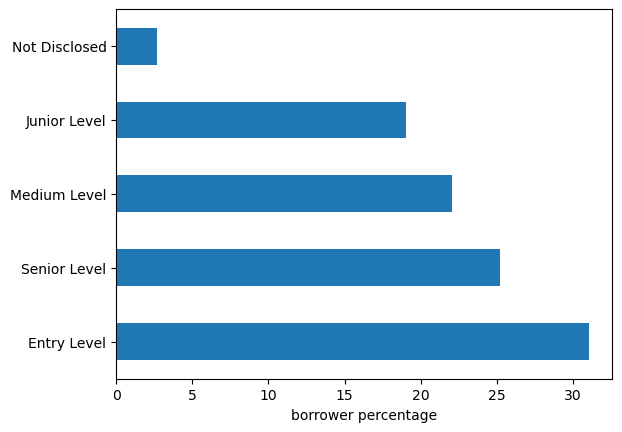

In [59]:
(df_loan1['exp_cat'].value_counts(normalize = True)*100).plot.barh()
plt.xlabel('borrower percentage')

## Observation from above graph
- **Above graph shows significant portion of loan has been issued to Entry level and Junior level, eventhough their income will be less compared to middle and senior level borrowers**

In [60]:
df_loan1.head(20).T

,0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
funded_amnt,5000,2500,2400,10000,5000,7000,3000,5600,5375,6500,12000,9000,3000,10000,1000,10000,3600,6000,9200,20250
term_in_months,36,60,36,36,36,60,36,60,60,60,36,36,36,36,36,36,36,36,36,60
int_rate,10.65,15.27,15.96,13.49,7.9,15.96,18.64,21.28,12.69,14.65,12.69,13.49,9.91,10.65,16.29,15.27,6.03,11.71,6.03,15.27
emp_length,10+ years,< 1 year,10+ years,10+ years,3 years,8 years,9 years,4 years,< 1 year,5 years,10+ years,< 1 year,3 years,3 years,< 1 year,4 years,10+ years,1 year,6 years,3 years
home_ownership,RENT,RENT,RENT,RENT,RENT,RENT,RENT,OWN,RENT,OWN,OWN,RENT,RENT,RENT,RENT,RENT,MORTGAGE,MORTGAGE,RENT,RENT
annual_inc,24000.0,30000.0,12252.0,49200.0,36000.0,47004.0,48000.0,40000.0,15000.0,72000.0,75000.0,30000.0,15000.0,100000.0,28000.0,42000.0,110000.0,84000.0,77385.19,43370.0
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified,Not Verified,Source Verified,Source Verified,Verified,Not Verified,Source Verified,Source Verified,Source Verified,Source Verified,Not Verified,Not Verified,Not Verified,Verified,Not Verified,Verified
issue_d,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011
loan_status,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Charged Off,Charged Off,Fully Paid,Fully Paid,Charged Off,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid
purpose,credit_card,car,small_business,other,wedding,debt_consolidation,car,small_business,other,debt_consolidation,debt_consolidation,debt_consolidation,credit_card,other,debt_consolidation,home_improvement,major_purchase,medical,debt_consolidation,debt_consolidation


#

## 7) Categorisation of Applicant's DTI(Debt-To-Income) column
### Create low, medium, high, very high category for dti column to ease the categorical visualisation

In [61]:
df_loan1['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [62]:
def categorize_dti(ratio):
    if ratio <= 8.13:
        return 'Low'
    elif 8.13 < ratio <= 13.37:
        return 'Medium'
    elif 13.37 < ratio <= 18.56 :
        return 'High'
    else:
        return 'Very High'
    
df_loan1['dti_cat'] = df_loan1['dti'].apply(categorize_dti)

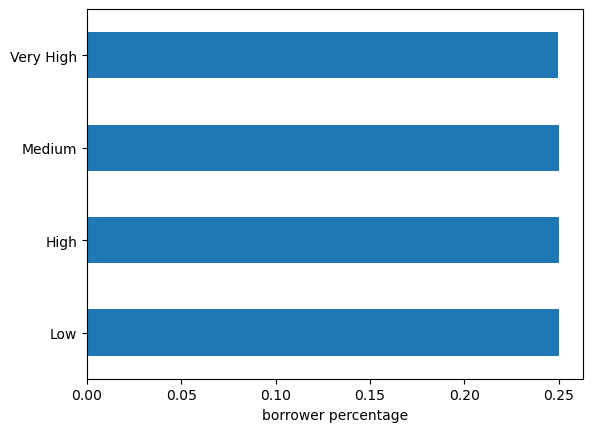

In [63]:
df_loan1['dti_cat'].value_counts(normalize = True).plot.barh()
plt.xlabel('borrower percentage')
plt.show()

In [64]:
df_loan1.head(20).T

,0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
funded_amnt,5000,2500,2400,10000,5000,7000,3000,5600,5375,6500,12000,9000,3000,10000,1000,10000,3600,6000,9200,20250
term_in_months,36,60,36,36,36,60,36,60,60,60,36,36,36,36,36,36,36,36,36,60
int_rate,10.65,15.27,15.96,13.49,7.9,15.96,18.64,21.28,12.69,14.65,12.69,13.49,9.91,10.65,16.29,15.27,6.03,11.71,6.03,15.27
emp_length,10+ years,< 1 year,10+ years,10+ years,3 years,8 years,9 years,4 years,< 1 year,5 years,10+ years,< 1 year,3 years,3 years,< 1 year,4 years,10+ years,1 year,6 years,3 years
home_ownership,RENT,RENT,RENT,RENT,RENT,RENT,RENT,OWN,RENT,OWN,OWN,RENT,RENT,RENT,RENT,RENT,MORTGAGE,MORTGAGE,RENT,RENT
annual_inc,24000.0,30000.0,12252.0,49200.0,36000.0,47004.0,48000.0,40000.0,15000.0,72000.0,75000.0,30000.0,15000.0,100000.0,28000.0,42000.0,110000.0,84000.0,77385.19,43370.0
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified,Not Verified,Source Verified,Source Verified,Verified,Not Verified,Source Verified,Source Verified,Source Verified,Source Verified,Not Verified,Not Verified,Not Verified,Verified,Not Verified,Verified
issue_d,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011
loan_status,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Charged Off,Charged Off,Fully Paid,Fully Paid,Charged Off,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid
purpose,credit_card,car,small_business,other,wedding,debt_consolidation,car,small_business,other,debt_consolidation,debt_consolidation,debt_consolidation,credit_card,other,debt_consolidation,home_improvement,major_purchase,medical,debt_consolidation,debt_consolidation


#

# Bivariate and Multivariate Analysis

## 1) Relationship between Loan Status and Interest Rate Categories

In [65]:
df_loan1['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [66]:
df_loan1['int_cat'].value_counts()

Medium Interest    24856
Low Interest        8218
High Interest       5503
Name: int_cat, dtype: int64

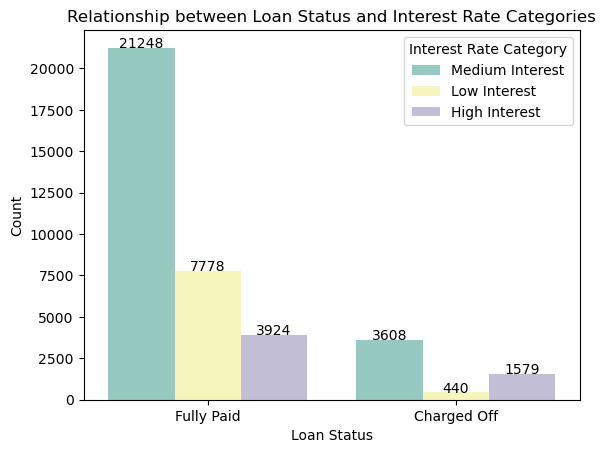

In [67]:
ax = sns.countplot(x='loan_status', hue='int_cat', data=df_loan1, palette='Set3')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center")

plt.title('Relationship between Loan Status and Interest Rate Categories')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Interest Rate Category')
plt.show()

In [68]:
print('Loan default probability for Medium Interest Rate is 1 person in {0} borrowers.'.format(round((21248+3608)/3608)))
print('Loan default probability for Low Interest Rate is 1 person in {0} borrowers.'.format(round((7778+440)/440)))
print('Loan default probability for High Interest Rate is 1 person in {0} borrowers.'.format(round((3924+1579)/1579)))


Loan default probability for Medium Interest Rate is 1 person in 7 borrowers.
Loan default probability for Low Interest Rate is 1 person in 19 borrowers.
Loan default probability for High Interest Rate is 1 person in 3 borrowers.


### Observation from above graph
- **Loan default probability for Medium Interest Rate is 1 person in 7 borrowers.**
- **Loan default probability for Low Interest Rate is 1 person in 19 borrowers.**
- **Loan default probability for High Interest Rate is 1 person in 3 borrowers.**
### It is evident that if the interest rate is high then the loan default chances are considerably high

#

## 2) Relationship between Loan Status and Funded Amount Categories

In [69]:
df_loan1['funded_cat'].value_counts()

Very High    9887
Low          9708
Medium       9586
High         9396
Name: funded_cat, dtype: int64

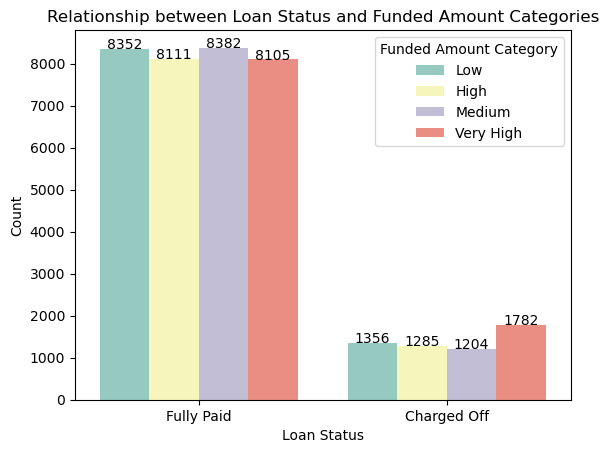

In [70]:
ax = sns.countplot(x='loan_status', hue='funded_cat', data=df_loan1, palette='Set3')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center")

plt.title('Relationship between Loan Status and Funded Amount Categories')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Funded Amount Category')
plt.show()

### Observation from above graph
### There is minimal affect on loan default with respect to size of loan borrowed as graph shows similar Charged Off ratio for all categories

#

## 3) Relationship between Loan Status and Borrower's annual income Categories

In [71]:
df_loan1['income_cat'].value_counts()

Very High    9730
Medium       9708
Low          9698
High         9441
Name: income_cat, dtype: int64

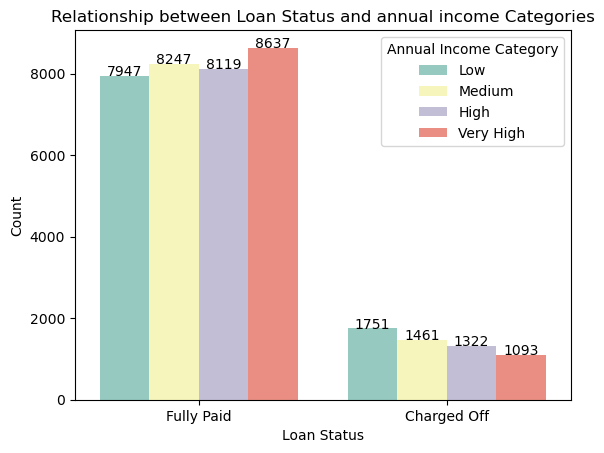

In [72]:
ax = sns.countplot(x='loan_status', hue='income_cat', data=df_loan1, palette='Set3')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center")

plt.title('Relationship between Loan Status and annual income Categories')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Annual Income Category')
plt.show()

### Observation from above graph
### There is increasing loan default risk trend with reducing annual income of a borrower. The difference between relative income category is less but low to very high income difference when considered Charged Off is significant.

#

## 4) Relationship between Loan Status and Debt to Income Ratio Categories

In [73]:
df_loan1['dti_cat'].value_counts()

Low          9651
High         9650
Medium       9649
Very High    9627
Name: dti_cat, dtype: int64

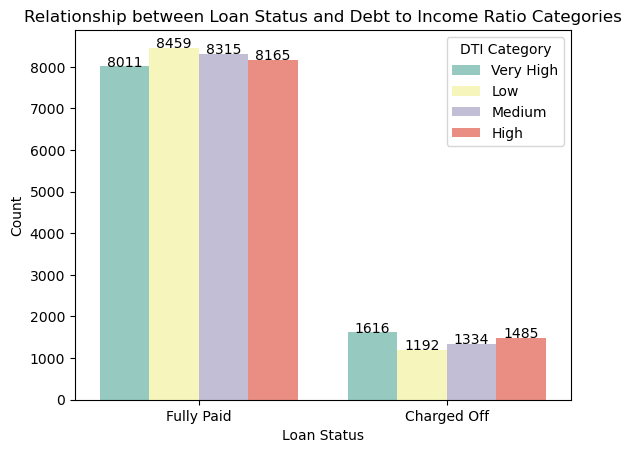

In [74]:
ax = sns.countplot(x='loan_status', hue='dti_cat', data=df_loan1, palette='Set3')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center")

plt.title('Relationship between Loan Status and Debt to Income Ratio Categories')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='DTI Category')
plt.show()

### Observation from above graph
### DTI is directly proportionate with Charged Off. when DTI is low there are less charged off cases, when DTI is high the chances of loan default is high

#

## 5) Relationship between Loan Status and Loan Term 

In [75]:
df_loan1['term_in_months'].value_counts()

36    29096
60     9481
Name: term_in_months, dtype: int64

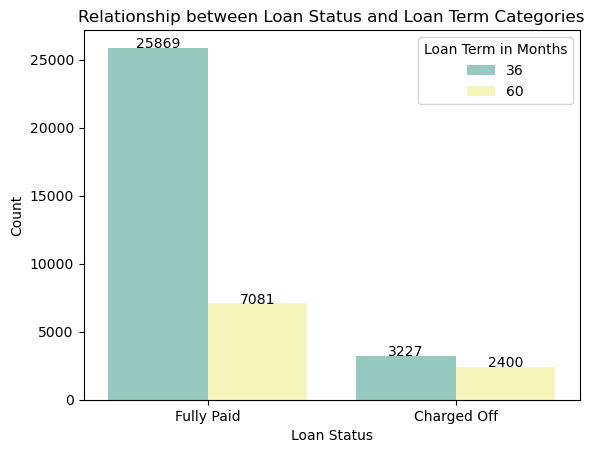

In [76]:
ax = sns.countplot(x='loan_status', hue='term_in_months', data=df_loan1, palette='Set3')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center")

plt.title('Relationship between Loan Status and Loan Term Categories')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Loan Term in Months')
plt.show()

### Observation from above graph
### There is 2.5 Times more risk of default when the loan term is 60 Months compared to 36 months.

#

## 6) Relationship between Loan Status and Specific Purposes

In [77]:
df_loan1['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

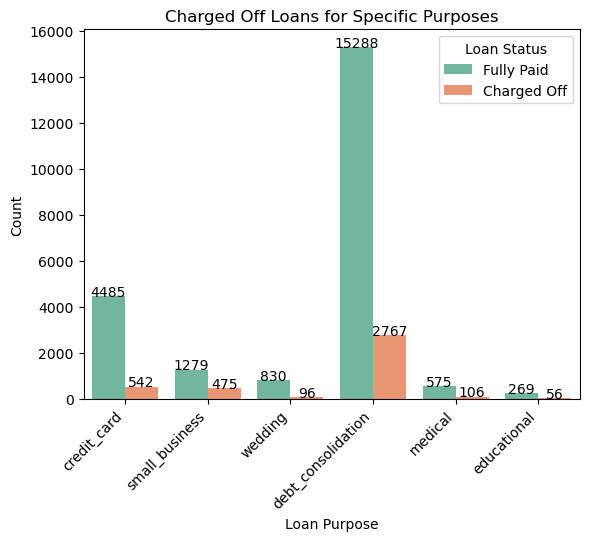

In [78]:
#Charged Off Loans for Specific Purposes
selected_purposes = ['debt_consolidation', 'credit_card', 'small_business', 'educational', 'wedding', 'medical']
df_selected = df_loan1[df_loan1['purpose'].isin(selected_purposes)]

ax = sns.countplot(x='purpose', hue='loan_status', data=df_selected, palette='Set2')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center")


plt.title('Charged Off Loans for Specific Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.show()

In [79]:
print('credit card loan default ratio 1:',round(5027/542))
print('small business loan default ratio 1:',round(1754/475))
print('wedding loan default ratio 1:',round(926/96))
print('debt consolidation loan default ratio 1:',round(18055/2767))
print('medical loan default ratio 1:',round(681/106))
print('educational loan default ratio 1:',round(325/56))

credit card loan default ratio 1: 9
small business loan default ratio 1: 4
wedding loan default ratio 1: 10
debt consolidation loan default ratio 1: 7
medical loan default ratio 1: 6
educational loan default ratio 1: 6


### Observation from above graph
- credit card loan default ratio 1: 9
- small business loan default ratio 1: 4
- wedding loan default ratio 1: 10
- debt consolidation loan default ratio 1: 7
- medical loan default ratio 1: 6
- educational loan default ratio 1: 6
### Loan taken for small business, medical, educational are of high chance to be charged off than other purposes. 

#

## 7) Relationship between Loan Status, Experience level

In [80]:
df_loan1['exp_cat'].value_counts()

Entry Level      11968
Senior Level      9714
Medium Level      8508
Junior Level      7354
Not Disclosed     1033
Name: exp_cat, dtype: int64

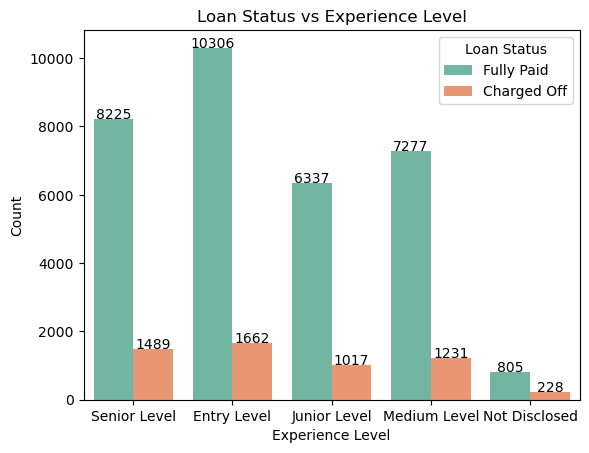

In [81]:
ax=sns.countplot(x='exp_cat', hue='loan_status', data=df_loan1, palette='Set2')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center")

plt.title('Loan Status vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [82]:
print('senior level loan default ratio 1:',(round(9714/1489)))
print('Entry level loan default ratio 1:',(round(11968/1662)))
print('Junior level loan default ratio 1:',(round(7354/1017)))
print('Medium level loan default ratio 1:',(round(8508/1231)))
print('Not disclosed loan default ratio 1:',(round(1033/228)))

senior level loan default ratio 1: 7
Entry level loan default ratio 1: 7
Junior level loan default ratio 1: 7
Medium level loan default ratio 1: 7
Not disclosed loan default ratio 1: 5


### Observation from above graph
- senior level loan default ratio 1: 7
- Entry level loan default ratio 1: 7
- Junior level loan default ratio 1: 7
- Medium level loan default ratio 1: 7

### Loan taken by all experience level borrower's loan default ratio is same 1 person for 7 borrowers. 

#

## 8) Relationship between Loan Status and Home ownership

In [83]:
df_loan1['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

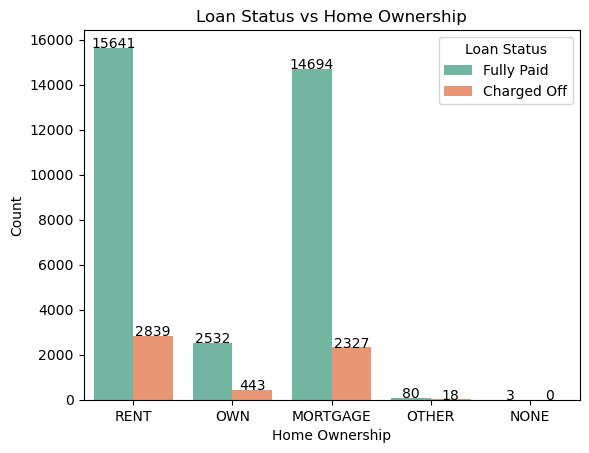

In [84]:
ax=sns.countplot(x='home_ownership', hue='loan_status', data=df_loan1, palette='Set2')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center")

plt.title('Loan Status vs Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

## Observation from above graph
- **Borrowers who have rent and mortgage category are more likely to take loans.** 
- **And the default is considerably high in numbers of both rent and mortgage category.**


#

# Multivariate Analysis

## 1) Relationship between Annual income, Experience and loan status == Charged Off

In [85]:
df_default = df_loan1[df_loan1['loan_status'] == 'Charged Off']

In [86]:
df_default.head().T

,1,8,9,12,14
funded_amnt,2500,5600,5375,9000,10000
term_in_months,60,60,60,36,36
int_rate,15.27,21.28,12.69,13.49,10.65
emp_length,< 1 year,4 years,< 1 year,< 1 year,3 years
home_ownership,RENT,OWN,RENT,RENT,RENT
annual_inc,30000.0,40000.0,15000.0,30000.0,100000.0
verification_status,Source Verified,Source Verified,Verified,Source Verified,Source Verified
issue_d,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011
loan_status,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off
purpose,car,small_business,other,debt_consolidation,other


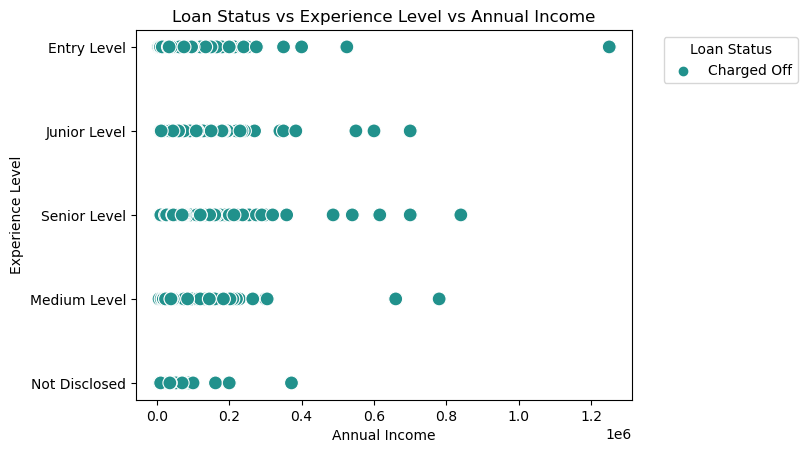

In [87]:
sns.scatterplot(x='annual_inc', y='exp_cat', hue='loan_status', data=df_default, palette='viridis', s=100)

plt.title('Loan Status vs Experience Level vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Experience Level')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Observation from above graph
### The loan default is concentrated at the low income borrowers of each experience level, higher the income lesser the chances of default for all experience level category

#

## 2) Loan status v/s Purpose v/s Loan amount

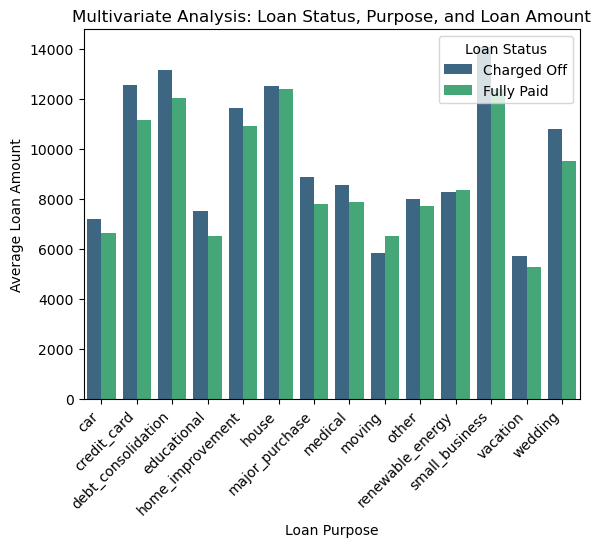

In [88]:
df_grouped = df_loan1.groupby(['purpose', 'loan_status']).agg({'funded_amnt': 'mean'}).reset_index()

sns.barplot(x='purpose', y='funded_amnt', hue='loan_status', data=df_grouped, palette='viridis')

plt.title('Multivariate Analysis: Loan Status, Purpose, and Loan Amount')
plt.xlabel('Loan Purpose')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Loan Status')
plt.show()

In [89]:
df_grouped

,purpose,loan_status,funded_amnt
0,car,Charged Off,7202.656250
1,car,Fully Paid,6619.118745
2,credit_card,Charged Off,12546.125461
3,credit_card,Fully Paid,11155.005574
4,debt_consolidation,Charged Off,13130.375858
5,debt_consolidation,Fully Paid,12041.537480
6,educational,Charged Off,7508.482143
7,educational,Fully Paid,6522.118959
8,home_improvement,Charged Off,11640.994236
9,home_improvement,Fully Paid,10908.217959


## Observation from above graph
### The mean charged off amount is relatively higher than paid off mean amount in almost all the loan purpose categories.  

#

## 3) Annual Income, Purpose, and Loan Amount for Top 5 Charged-Off Purposes

In [90]:
df_default.head().T

,1,8,9,12,14
funded_amnt,2500,5600,5375,9000,10000
term_in_months,60,60,60,36,36
int_rate,15.27,21.28,12.69,13.49,10.65
emp_length,< 1 year,4 years,< 1 year,< 1 year,3 years
home_ownership,RENT,OWN,RENT,RENT,RENT
annual_inc,30000.0,40000.0,15000.0,30000.0,100000.0
verification_status,Source Verified,Source Verified,Verified,Source Verified,Source Verified
issue_d,Dec 2011,Dec 2011,Dec 2011,Dec 2011,Dec 2011
loan_status,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off
purpose,car,small_business,other,debt_consolidation,other


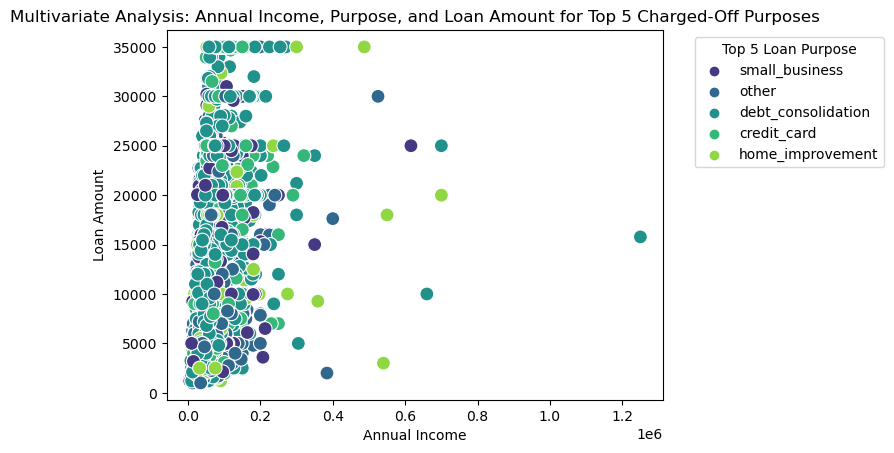

In [91]:
top_purposes = df_default['purpose'].value_counts().nlargest(5).index

df_default_top5 = df_default[df_default['purpose'].isin(top_purposes)]

sns.scatterplot(x='annual_inc', y='funded_amnt', hue='purpose', data=df_default_top5, palette='viridis', s=100)

plt.title('Multivariate Analysis: Annual Income, Purpose, and Loan Amount for Top 5 Charged-Off Purposes')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Top 5 Loan Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Observation from above Graph
- **Loan amount is least concerned as the above graph shows distribution of loan across all amount range**
- **Loan taken for all the purposes is highly concentrated at low annual income range.**

#

## 4) Annual Income category , Home ownership, and Loan Default Realtionship

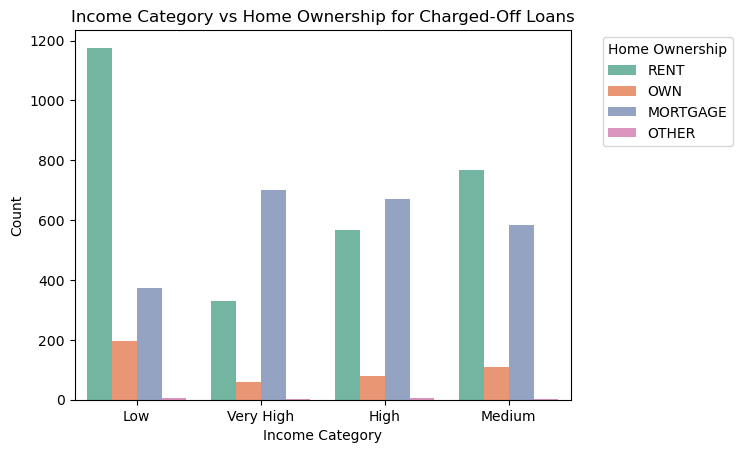

In [92]:
sns.countplot(x='income_cat', hue='home_ownership', data=df_default, palette='Set2')

plt.title('Income Category vs Home Ownership for Charged-Off Loans')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.legend(title='Home Ownership', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Observation from above graph
- **Loan Default is considerably high in low and medium Income category of Rented home applicants**
- **Loan default is higher in high and very high Income category of those who has home mortgage**

#

## 5) Correlation Heatmap of Numerical Columns

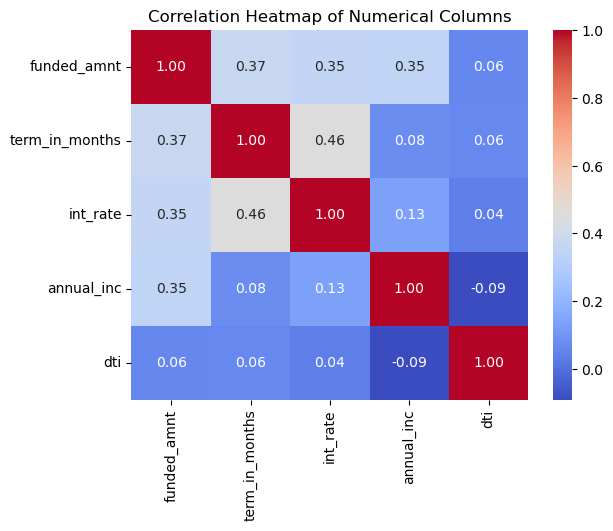

In [93]:
numeric_columns = ['funded_amnt', 'term_in_months', 'int_rate', 'annual_inc', 'dti']
correlation_matrix = df_default[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()